In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

*Note: You are not expected to understand all the computer coding presented with the solutions. You should understand the mathematical concepts and be able to recover the results. We present the computer code so you can learn coding tricks (e.g. read data, compute useful values, fit and plot data) should you be interested.*

# Chapter 6 - Problem Sheet

## Problem 1

### Fitting a powerlaw model

The radio spectrum of most pulsars empirically follows a powerlaw relationship $F(\nu) = F_0 \nu^{\alpha}$, where $F(\nu)$ is the flux at a given frequency $\nu$ in GHz, $F_0$ is the flux at $1\,GHz$ and $\alpha$ is called the powerlaw index. It is common to recover the spectral parameters $F_0$ and $\alpha$ by fitting a straight line using a least-square method as seen in Chapter 5 to a $\log F(\nu)$ vs $log(\nu)$ plot instead due to the non-linear nature of the powerlaw (see the figure below).

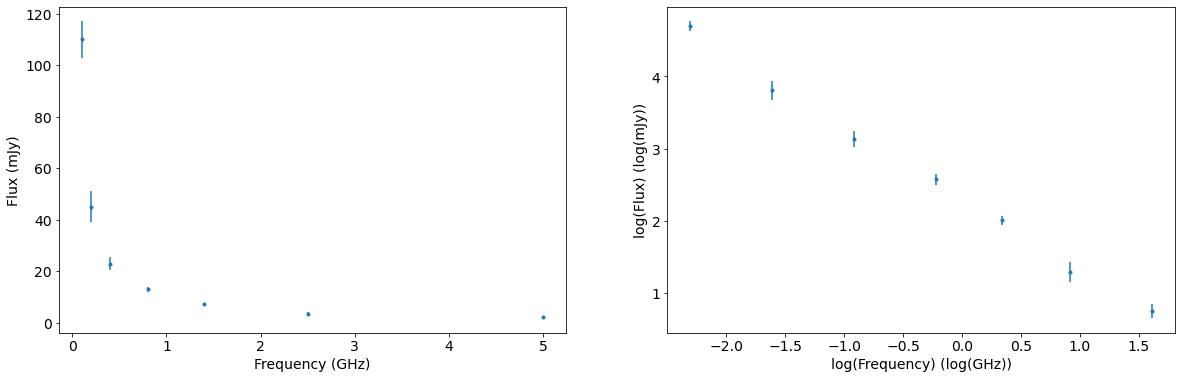

In [3]:
## Creating some mock data
nu = np.r_[             0.1, 0.2, 0.4,  0.8,     1.4, 2.5, 5.0]
Fnu_predicted = np.r_[  100,  50,  25, 12.5, 100./14,   4,   2]
Fnu = np.r_[            110,  45,  23, 13.1,     7.4, 3.6, 2.1]
Fnu_err = np.r_[          7,   6, 2.5,    1,     0.5, 0.5, 0.2]

fig,ax = plt.subplots(1, 2, figsize=[20,6])
_ = ax[0].errorbar(nu, Fnu, yerr=Fnu_err, fmt='.')
_ = ax[1].errorbar(np.log(nu), np.log(Fnu), yerr=Fnu_err/Fnu, fmt='.')

ax[0].set_ylabel('Flux (mJy)')
ax[0].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('log(Flux) (log(mJy))')
ax[1].set_xlabel('log(Frequency) (log(GHz))');

#### Task 1
Using the change of variables $y = \log(F(\nu))$ and $x = \log(\nu)$, show that the powerlaw model can be written as $y = mx + b$.<br><br>

#### Task 2
Find an expression for the uncertainty on $y$, $\Delta y$, given that the fluxes have uncertainties $\Delta F$.<br><br>

#### Task 3
Discuss the validity of the method of fitting a straight line to the log-log relationship. In particular, comment on what approximation is made and when it is no longer appropriate to use this method.

## Problem 2

### Random number generation

#### Task 1

Calculate the various modulous quantities:

a) $5 \operatorname{mod} 21$<br>
b) $1023 \operatorname{mod} 500$<br>
d) $83 \operatorname{mod} 15$<br>
d) $345 \operatorname{mod} 8943$<br>

### Task 2

Given that the following sequence of pseudo-random numbers was produced with a linear congruential generator, provide the next 3 numbers in the sequence: {2, 5, 38, 54, 21, 89, 105, 2}.

## Problem 3

### Rejection sampling integration

Calculate the integral of $10 \cos (x \pi)$ in the range $x = [0, 0.5]$ using the rejection sampling integration. To do so, you will use a Monte Carlo with 10 draws generated with an linear congruential generator with modulus $m=89$, multiplier $a=3$ and increment $c=1$.

#### Task 1
Using a seed value $n_0 = 71$, show that the first 10 draws from this linear congruential generator are {36, 20, 61, 6, 19, 58, 86, 81, 66, 21, 64}.<br><br>

#### Task 2
Use the first 5 draws from above to create the sequence $x_i$ at which the function is evaluated. Show that the $x_i$ are {0.202, 0.112, 0.343, 0.034, 0.107}.<br><br>

#### Task 3
Use the following 5 draws to generate your $r_i$ to decide if the ratio $f(x_i) / f_{\rm max}$ is accepted or not. Show that the $r_i$ are {0.652, 0.966, 0.910, 0.742, 0.236}.<br><br>

#### Task 4
Calculate the integral using the rejection sampling.<br><br>

#### Task 5
How does the value compare with the integral calculated analytically?

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>